<a href="https://colab.research.google.com/github/sunanda-debnath/Yes-Bank-Stock-Predication/blob/main/Yes__Bank__Stock_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Yes Bank Stock Predication**
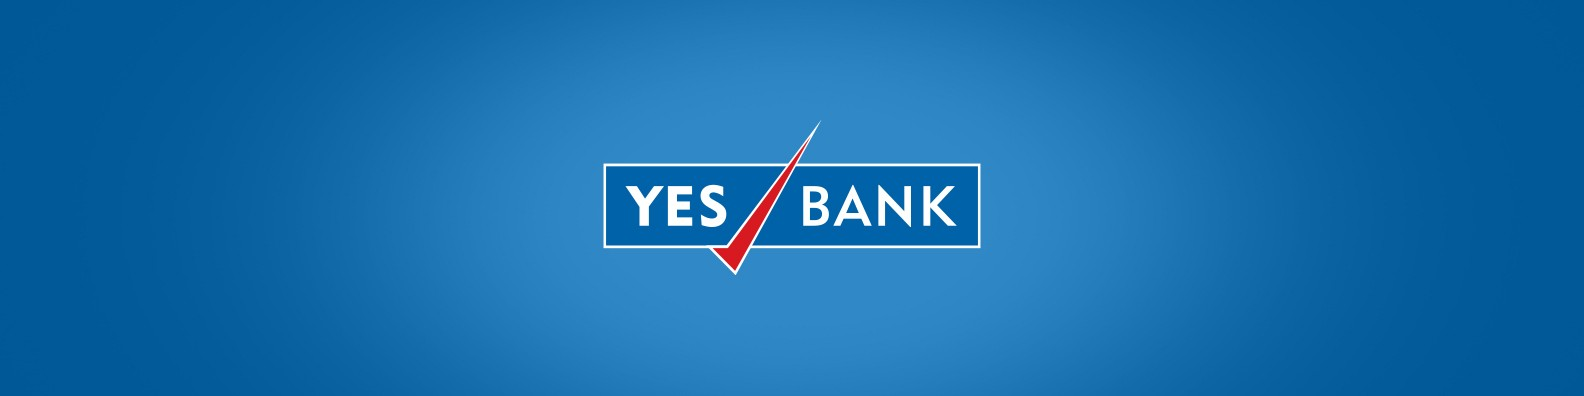

**Problem statement:** Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

**Understanding the Problem Statement:** Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. psychological, rational and irrational behavior, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy. Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

*  Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.
*  Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

Our focus will be on the technical analysis part. We’ll be using a dataset.

**What is stock?**

A Stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company.

Since, we've the **YES BANK** Stock price dataset which has the monthly stock prices of the bank since its inception. It contains the following features:



*   **Date:** It denotes date of investment done (in our case we have month and year).
*   **Open:** Open means the price at which a stock started trading when the opening bell rang.
*   **High:** High refer to the maximum prices in a given time period.

*   **Low:** Low refer to the minimum prices in a given time period.
*   **Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.


In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

#Model Evaluation 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/project 2/data_YesBank_StockPrices.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [8]:
df.shape

(185, 5)

In [9]:
df.info

<bound method DataFrame.info of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

In [10]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [11]:
#check null values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [12]:
len(df[df.duplicated()])

0

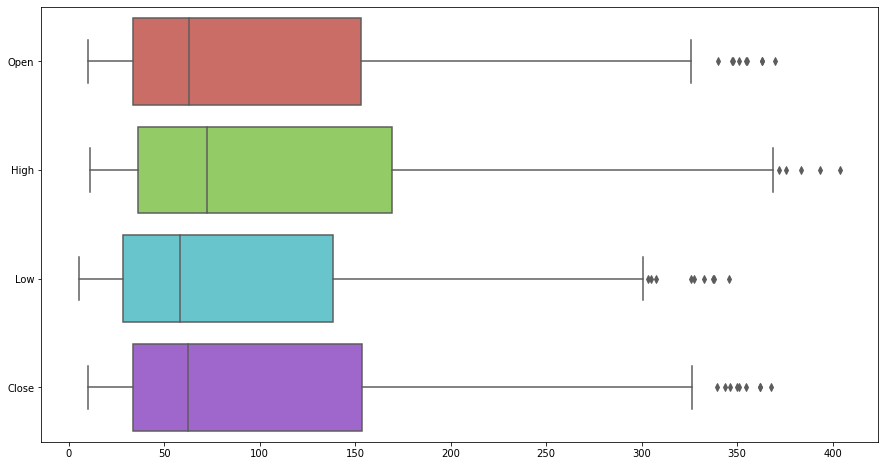

In [32]:
#checking outliers 
plt.figure(figsize= (15, 8))
sns.boxplot(data=df, orient="h", palette="hls")

# **Exploratory Data Analysis**

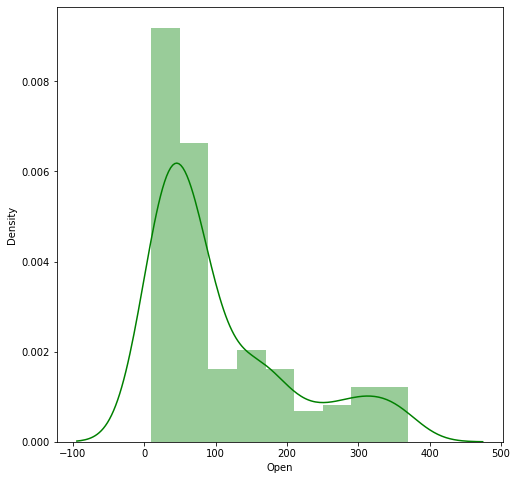

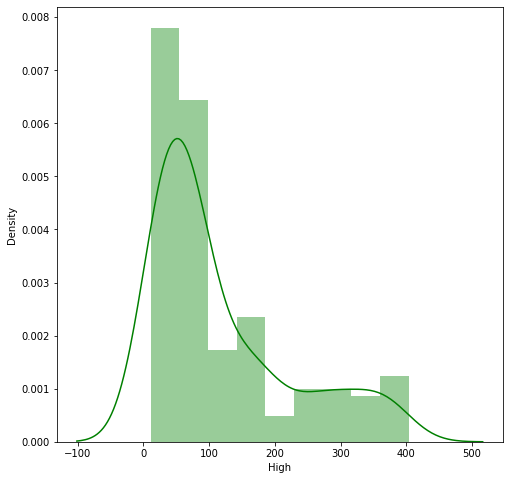

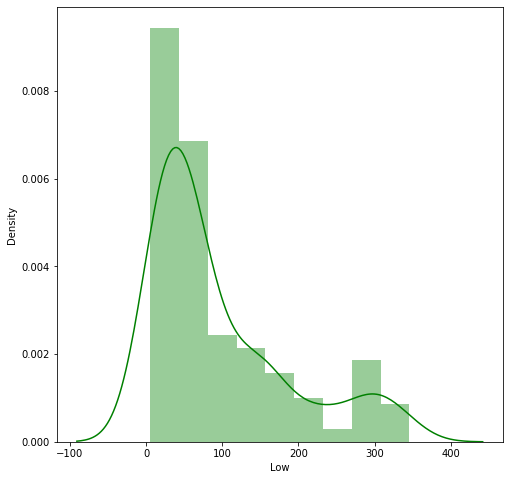

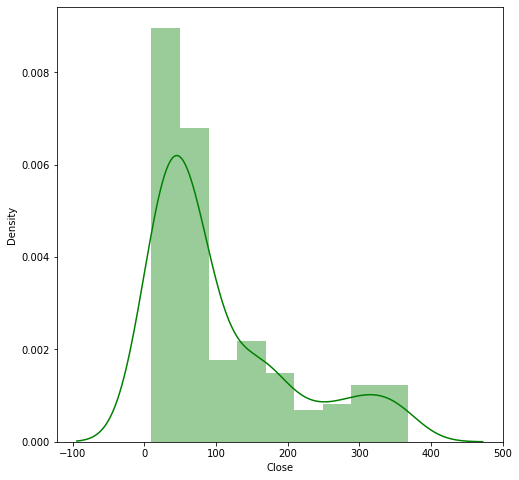

In [20]:
plt.figure(figsize=(8,8))
sns.distplot(df['Open'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['High'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['Low'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['Close'], color='g')

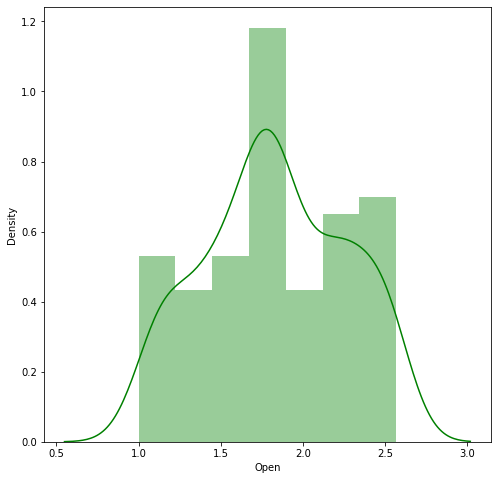

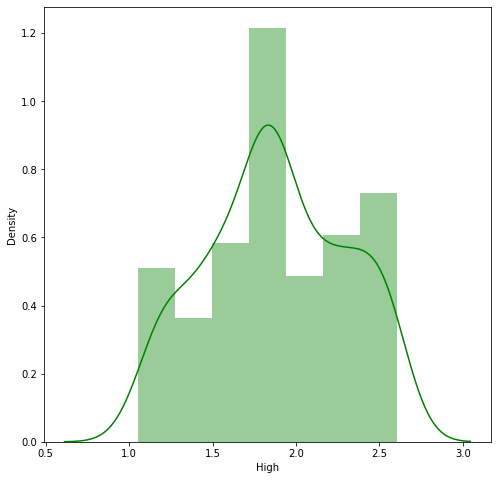

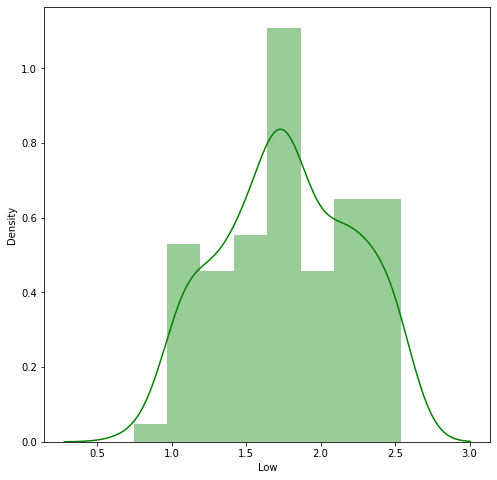

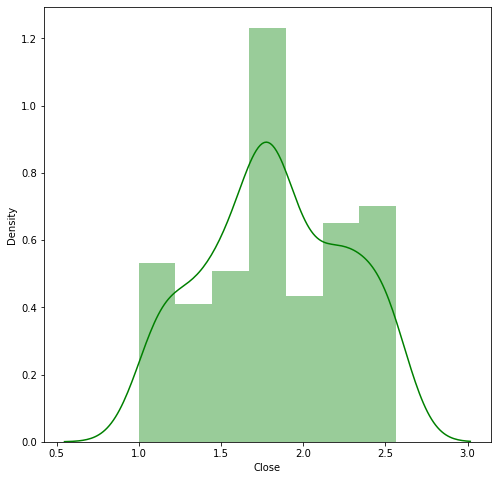

In [21]:
# Normal Distribution 
plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Open']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['High']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Low']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log10(df['Close']), color='g')

**Multivariate Analysis**

In [22]:
#Convertting Date column from object to date type(Data wrangling)
df['Date']= pd.to_datetime(df['Date'], format= '%b-%y')

In [24]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [23]:
Yearly_df= df.groupby('Date')['Close'].mean().reset_index()
Yearly_df.head()

,Date,Close
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


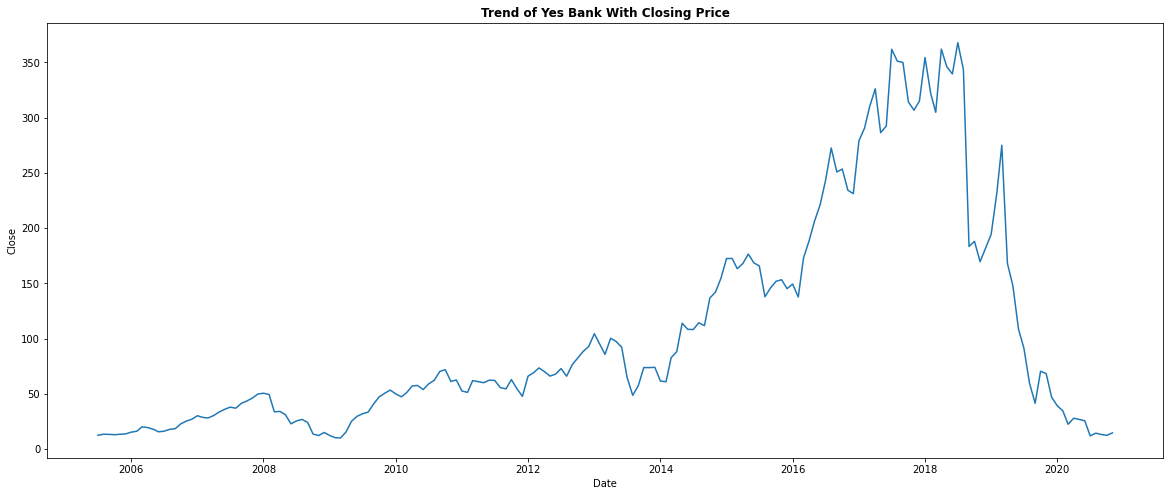

In [33]:
plt.figure(figsize= [20, 8])
plt.title("Trend of Yes Bank With Closing Price", fontweight = 'bold')
sns.lineplot(data=Yearly_df, x= 'Date', y= 'Close', palette= 'husl' )

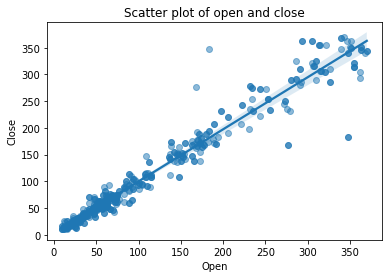

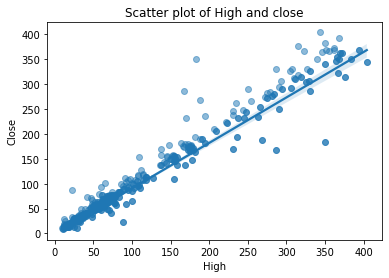

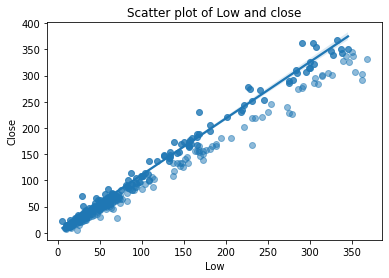

In [34]:
# To find relational between dependent variable and independent variable

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter plot of open and close')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x="Open", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter plot of High and close')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x="High", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter plot of Low and close')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x="Low", y="Close", data=df)
plt.show()
